<a href="https://colab.research.google.com/github/bbash/ArewaDS-Deep-Learning/blob/main/Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 1

## Name of Member:

In [22]:
# Import torch
import torch

# import torch and nn
from torch import nn

# import the troch vision library
import torchvision
import torchvision.transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device is: {device}")

Device is: cuda


# Data Setting

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "glioma_meningioma_notumor_pituitary"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download glioma, meningioma, notumor, pituitary data
    with open(data_path / "glioma_meningioma_notumor_pituitary.zip", "wb") as f:
        request = requests.get("https://github.com/bbash/ArewaDS-Deep-Learning/raw/main/glioma_meningioma_notumor_pituitary.zip")
        print("Downloading glioma, meningioma, notumor, pituitary data...")
        f.write(request.content)

    # Unzip glioma, meningioma, notumor, pituitary data
    with zipfile.ZipFile(data_path / "glioma_meningioma_notumor_pituitary.zip", "r") as zip_ref:
        print("Unzipping glioma, meningioma, notumor, pituitary data...")
        zip_ref.extractall(image_path)

Did not find data/glioma_meningioma_notumor_pituitary directory, creating one...
Unzipping glioma, meningioma, notumor, pituitary data...


In [16]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



In [17]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/glioma_meningioma_notumor_pituitary'.
There are 4 directories and 0 images in 'data/glioma_meningioma_notumor_pituitary/Training'.
There are 0 directories and 50 images in 'data/glioma_meningioma_notumor_pituitary/Training/pituitary'.
There are 0 directories and 50 images in 'data/glioma_meningioma_notumor_pituitary/Training/meningioma'.
There are 0 directories and 50 images in 'data/glioma_meningioma_notumor_pituitary/Training/glioma'.
There are 0 directories and 50 images in 'data/glioma_meningioma_notumor_pituitary/Training/notumor'.
There are 4 directories and 0 images in 'data/glioma_meningioma_notumor_pituitary/Testing'.
There are 0 directories and 10 images in 'data/glioma_meningioma_notumor_pituitary/Testing/pituitary'.
There are 0 directories and 10 images in 'data/glioma_meningioma_notumor_pituitary/Testing/meningioma'.
There are 0 directories and 10 images in 'data/glioma_meningioma_notumor_pituitary/Testing/glioma'.
There are 0 

In [25]:
# Setup train and testing paths
train_dir = image_path / "Training"
test_dir = image_path / "Testing"

train_dir, test_dir

(PosixPath('data/glioma_meningioma_notumor_pituitary/Training'),
 PosixPath('data/glioma_meningioma_notumor_pituitary/Testing'))

Random image path: data/glioma_meningioma_notumor_pituitary/Training/notumor/Tr-no_0024.jpg
Image class: notumor
Image height: 630
Image width: 630


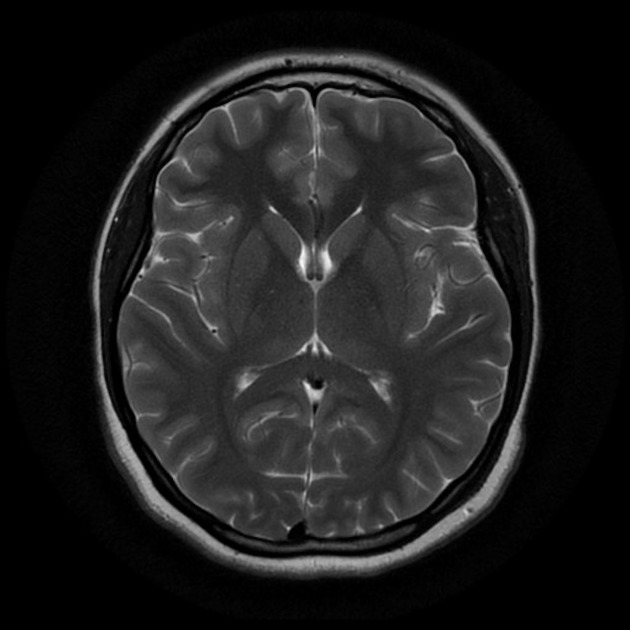

In [19]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

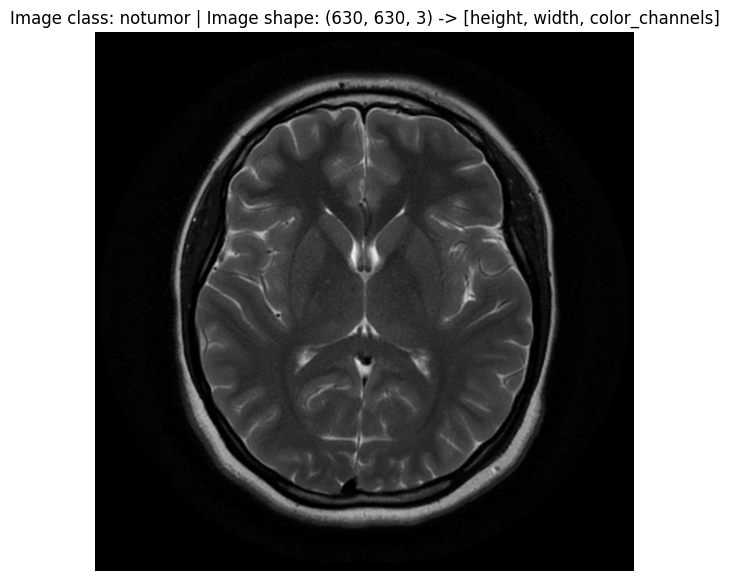

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## Transforming data

In [23]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

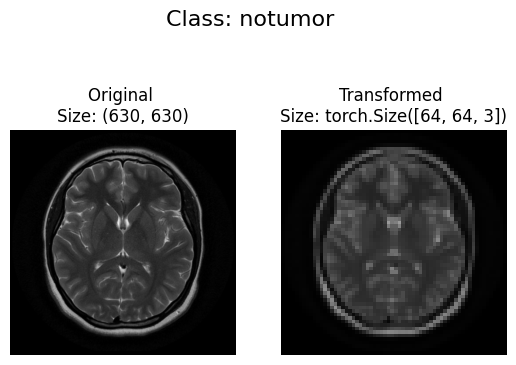

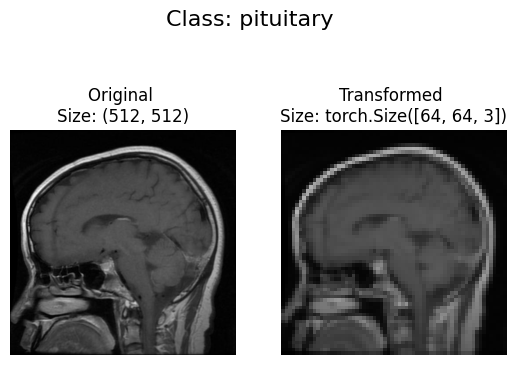

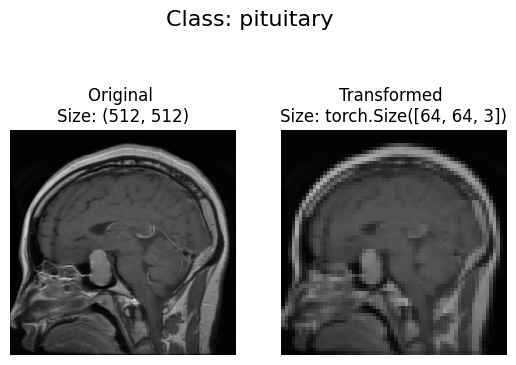

In [24]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

## Loading Image Data Using ImageFolder

In [26]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 200
    Root location: data/glioma_meningioma_notumor_pituitary/Training
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 40
    Root location: data/glioma_meningioma_notumor_pituitary/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [27]:
# Get class names as a list
class_names = train_data.classes
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [28]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [29]:
# Check the lengths
len(train_data), len(test_data)

(200, 40)

## Turn loaded images into DataLoader's

In [30]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d21eeb0be20>,
 <torch.utils.data.dataloader.DataLoader at 0x7d21eed59c60>)

In [31]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# Models